<a href="https://colab.research.google.com/github/sgsoul/mwtda/blob/main/MWTDA_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Лабораторная работа №1**

 Лоскутова Ирина 
 
 группа R32423

---

В этом блоке мы подключаем библиотеки и настраиваем параметры для построения графиков:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

Тут мы гененрируем наш датасет со 100 элементами и 7 центрами:

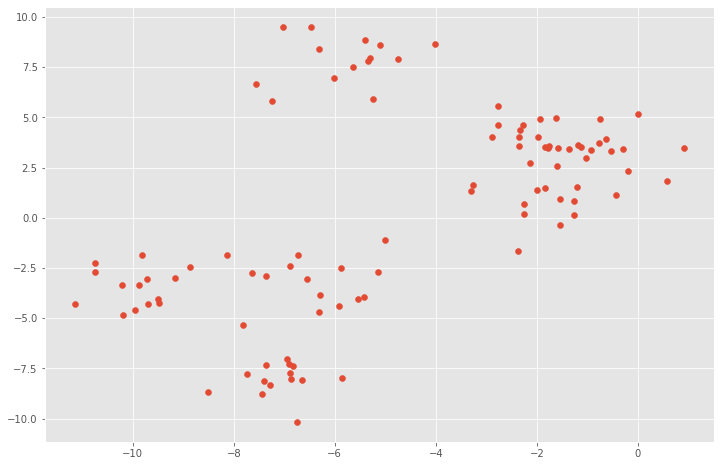

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, random_state=1, centers=7)
plt.scatter(X[:,0], X[:,1])

**K-means**



---



Подбираем оптимальное число кластеров:

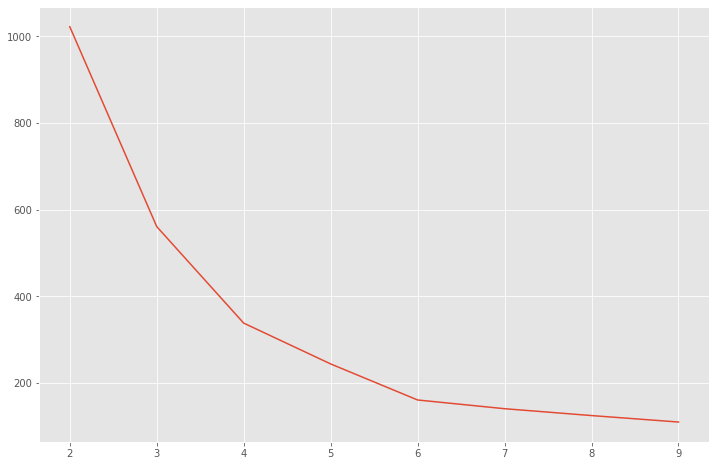

In [ ]:
from sklearn.cluster import KMeans

criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=4)
  kmeansModel.fit(X)
  criteries.append(kmeansModel.inertia_)
plt.plot(range(2,10), criteries)

Оптимальное число кластеров - 6. Обучаем модель:

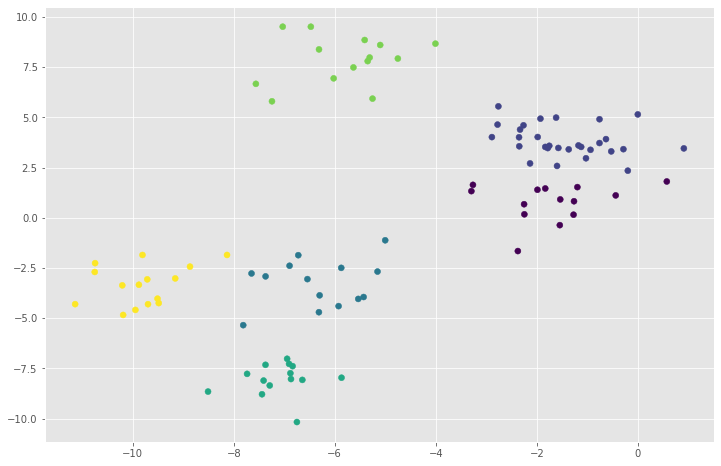

In [ ]:
kmeansModel = KMeans(n_clusters=6, random_state=0)
kmeansModel.fit(X)
plt.scatter(X[:,0],X[:,1], c = kmeansModel.labels_)

**DBSCAN**

---



Подбираем параметры для модели:

[ 0  1  0  0  0  1  2  3  1  3  0  2  0  2  3  4  4  5 -1  5 -1 -1  1  3
  3  0  2  4  5  2  5 -1  0  1  0  0  3  0  4  0  5  0  0  0  5  4  5  0
  4  3  4  0  1  2 -1  1  0  0  2 -1  0  2  4  5  0  4  5  0  3  2  0  2
  1 -1 -1 -1 -1  0  3  3  3  5  5 -1  2 -1 -1  0  3 -1  4  2  0  1 -1  0
  5  0  2 -1]


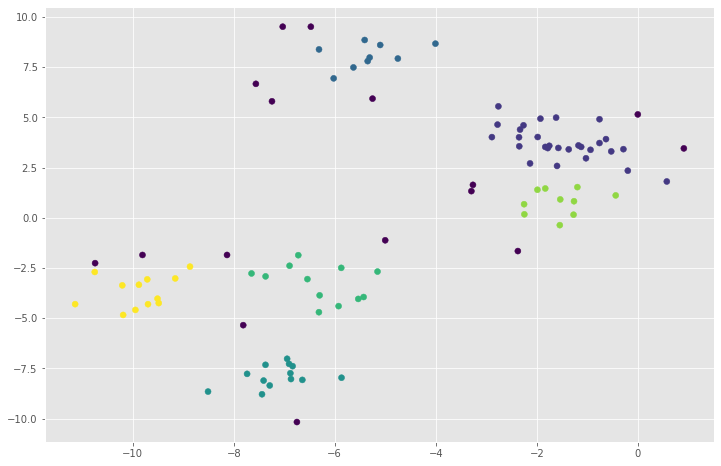

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps = 1.1, min_samples = 5).fit_predict(X)
print(clustering)
plt.scatter(X[:,0], X[:,1], c = clustering)

**3.0**

---


Импортируем данные:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
df

Mounted at /content/drive


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Выбираем нужные данные:

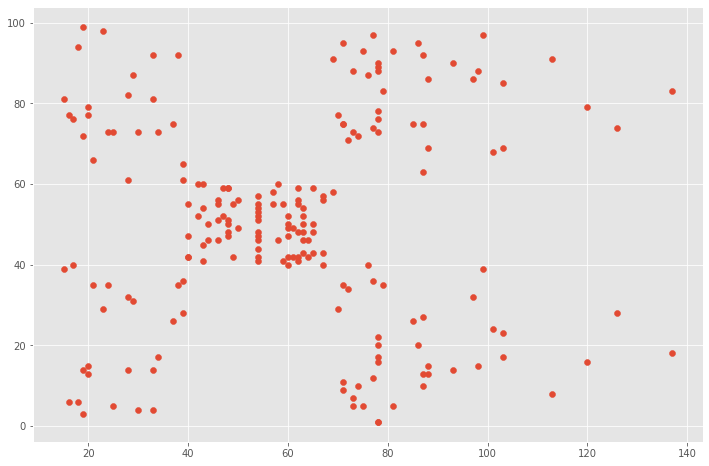

In [ ]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[::].values
plt.scatter(data[:,0], data[:,1])

Вычисляем количесвто кластеров методом локтя:

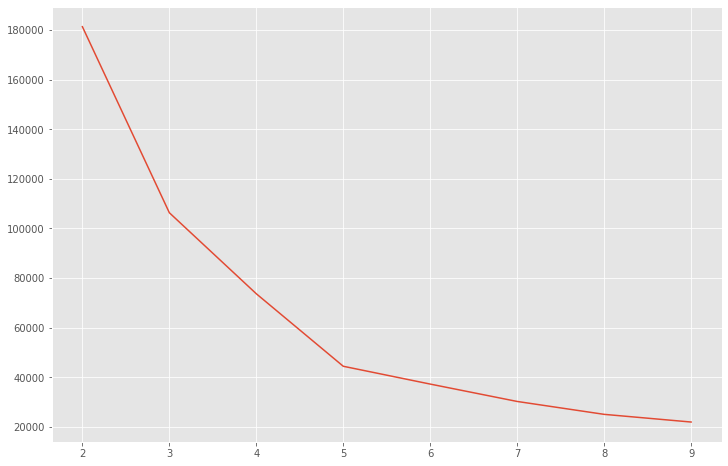

In [ ]:
criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=4)
  kmeansModel.fit(data)
  criteries.append(kmeansModel.inertia_)
plt.plot(range(2,10), criteries)

Оптимальное количество - 5. Обучаем модель:

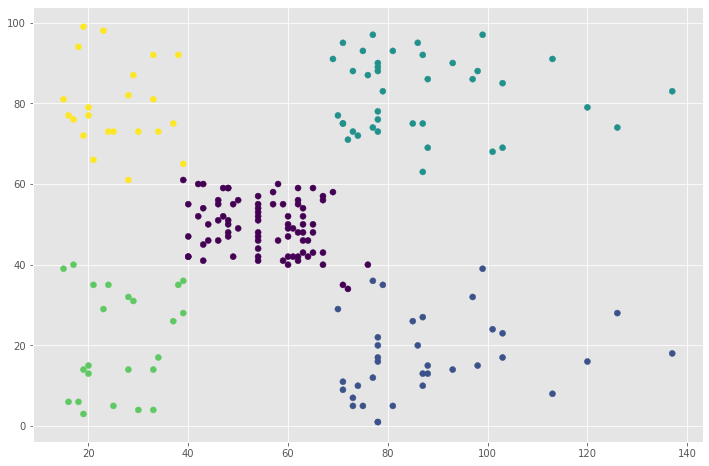

In [ ]:
kmeansModel = KMeans(n_clusters = 5)
kmeansModel.fit(data)
plt.scatter(data[:,0], data[:,1], c = kmeansModel.labels_)

Используем метод DBSCAN:

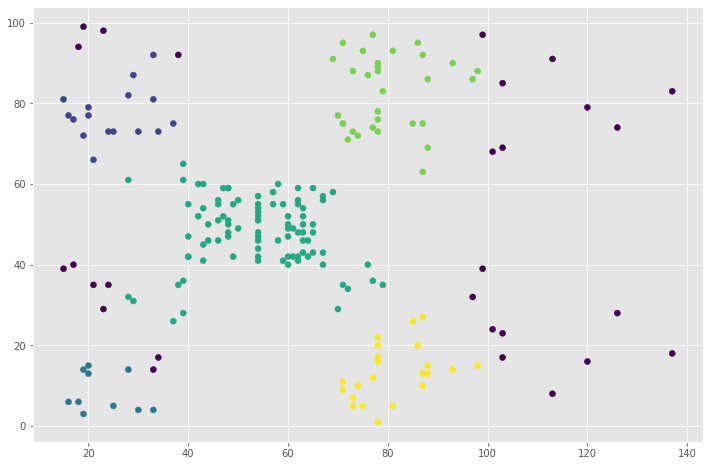

In [ ]:
clustering = DBSCAN(eps = 12, min_samples = 10)
pred_result = clustering.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = pred_result)
